### 1.1 Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### 1.2 Reading dataset
> In this section my goal is to load my dataset and its structure

In [2]:
df = pd.read_csv('C:/Users/HP/Documents/bigdata/CVD_cleaned.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


### 2. Some of important questions for data Analysis

Q1. What are the size, dimensions and structure of the dataset?

Q2. What is the  of the data set?

Q3. What are the data types of each column?

Q4. Are there any missing values in the dataset? If so, how prevalent are they?

Q5. Are there any variables that can be dropped as they are irrelevant or redundant?

Q6. What is the correlation of the features/atributes?

> What is the relationship between the variables?
  Are there any patterns, correlations, or trends in the data?

### 3 Getting into Explatory Data Analysis

In [3]:
df.shape

(308854, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

11 features are string, and 7 features are numerical. We can use `describe()` to display sample statistics such as `min`, `max`, `mean`,`std` for each attribute:

In [5]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


It described only the numerical(float64 Dtype) features

In [6]:
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [7]:
df.tail(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0
308853,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,45-49,160.0,81.19,31.71,No,1.0,5.0,12.0,1.0


In [8]:
# Are there any `NA`s or missing values in a dataset?
df.isnull().values.any()

False

In [9]:
# OR
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [10]:
df.drop_duplicates()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


##### The number of distinct values in a column.

In [11]:
df['Heart_Disease'].nunique()  # returns the number of distinct values in a Heart_Disease column.

2

In [12]:
for i in df.columns: # returns the number of distinct values in a whole column column.
  dis = len(df[i].unique())
  print(f"{i} has  {dis} unique value ")

General_Health has  5 unique value 
Checkup has  5 unique value 
Exercise has  2 unique value 
Heart_Disease has  2 unique value 
Skin_Cancer has  2 unique value 
Other_Cancer has  2 unique value 
Depression has  2 unique value 
Diabetes has  4 unique value 
Arthritis has  2 unique value 
Sex has  2 unique value 
Age_Category has  13 unique value 
Height_(cm) has  99 unique value 
Weight_(kg) has  525 unique value 
BMI has  3654 unique value 
Smoking_History has  2 unique value 
Alcohol_Consumption has  31 unique value 
Fruit_Consumption has  77 unique value 
Green_Vegetables_Consumption has  75 unique value 
FriedPotato_Consumption has  69 unique value 


In [13]:
df['Heart_Disease'].unique() # returns all the unique values in the specified column.

array(['No', 'Yes'], dtype=object)

<Axes: >

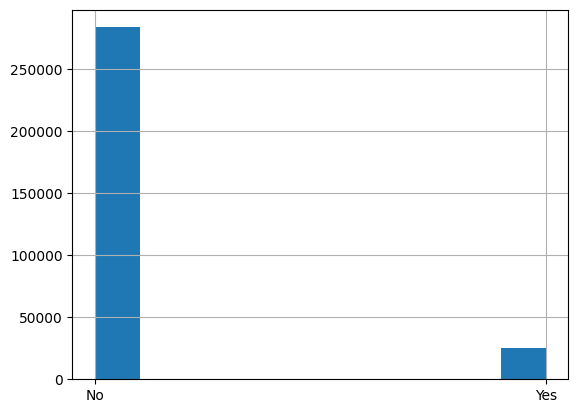

In [14]:
df['Heart_Disease'].hist() #generates a histogram of the specified column to give you an understanding about the distribution of your data.

In [15]:
from sklearn.preprocessing import OrdinalEncoder

In [16]:
enc = OrdinalEncoder()
df['Exercise'] = enc.fit_transform(df[['Exercise']])
df['Heart_Disease'] = enc.fit_transform(df[['Heart_Disease']])
df['Skin_Cancer'] = enc.fit_transform(df[['Skin_Cancer']])
df['Other_Cancer'] = enc.fit_transform(df[['Other_Cancer']])
df['Depression'] = enc.fit_transform(df[['Depression']])
df['Sex'] = enc.fit_transform(df[['Sex']])
df['Arthritis'] = enc.fit_transform(df[['Arthritis']])
df['Smoking_History'] = enc.fit_transform(df[['Smoking_History']])
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0.0,0.0,0.0,0.0,0.0,No,1.0,0.0,70-74,150.0,32.66,14.54,1.0,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,0.0,1.0,0.0,0.0,0.0,Yes,0.0,0.0,70-74,165.0,77.11,28.29,0.0,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,1.0,0.0,0.0,0.0,0.0,Yes,0.0,0.0,60-64,163.0,88.45,33.47,0.0,4.0,12.0,3.0,16.0
3,Poor,Within the past year,1.0,1.0,0.0,0.0,0.0,Yes,0.0,1.0,75-79,180.0,93.44,28.73,0.0,0.0,30.0,30.0,8.0
4,Good,Within the past year,0.0,0.0,0.0,0.0,0.0,No,0.0,1.0,80+,191.0,88.45,24.37,1.0,0.0,8.0,4.0,0.0


In [17]:
rank=['Poor','Fair','Good','Very Good','Excellent']
oe = OrdinalEncoder(categories=[rank])
df['General_Health']=oe.fit_transform(df[['General_Health']])
df.head(10)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,Within the past 2 years,0.0,0.0,0.0,0.0,0.0,No,1.0,0.0,70-74,150.0,32.66,14.54,1.0,0.0,30.0,16.0,12.0
1,3.0,Within the past year,0.0,1.0,0.0,0.0,0.0,Yes,0.0,0.0,70-74,165.0,77.11,28.29,0.0,0.0,30.0,0.0,4.0
2,3.0,Within the past year,1.0,0.0,0.0,0.0,0.0,Yes,0.0,0.0,60-64,163.0,88.45,33.47,0.0,4.0,12.0,3.0,16.0
3,0.0,Within the past year,1.0,1.0,0.0,0.0,0.0,Yes,0.0,1.0,75-79,180.0,93.44,28.73,0.0,0.0,30.0,30.0,8.0
4,2.0,Within the past year,0.0,0.0,0.0,0.0,0.0,No,0.0,1.0,80+,191.0,88.45,24.37,1.0,0.0,8.0,4.0,0.0
5,2.0,Within the past year,0.0,0.0,0.0,0.0,1.0,No,1.0,1.0,60-64,183.0,154.22,46.11,0.0,0.0,12.0,12.0,12.0
6,1.0,Within the past year,1.0,1.0,0.0,0.0,0.0,No,1.0,1.0,60-64,175.0,69.85,22.74,1.0,0.0,16.0,8.0,0.0
7,2.0,Within the past year,1.0,0.0,0.0,0.0,0.0,No,1.0,0.0,65-69,165.0,108.86,39.94,1.0,3.0,30.0,8.0,8.0
8,1.0,Within the past year,0.0,0.0,0.0,0.0,1.0,No,0.0,0.0,65-69,163.0,72.57,27.46,1.0,0.0,12.0,12.0,4.0
9,1.0,Within the past year,0.0,0.0,0.0,0.0,0.0,Yes,1.0,0.0,70-74,163.0,91.63,34.67,0.0,0.0,12.0,12.0,1.0


In [18]:
rank1=['No','No, pre-diabetes or borderline diabetes','Yes, but female told only during pregnancy','Yes']
oe1 = OrdinalEncoder(categories=[rank1])
df['Diabetes']=oe1.fit_transform(df[['Diabetes']])
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,Within the past 2 years,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70-74,150.0,32.66,14.54,1.0,0.0,30.0,16.0,12.0
1,3.0,Within the past year,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,70-74,165.0,77.11,28.29,0.0,0.0,30.0,0.0,4.0
2,3.0,Within the past year,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,60-64,163.0,88.45,33.47,0.0,4.0,12.0,3.0,16.0
3,0.0,Within the past year,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,75-79,180.0,93.44,28.73,0.0,0.0,30.0,30.0,8.0
4,2.0,Within the past year,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,80+,191.0,88.45,24.37,1.0,0.0,8.0,4.0,0.0


In [19]:
rank2=['Within the past year','Within the past 2 years','Within the past 5 years','5 or more years ago','Never']
oe2 = OrdinalEncoder(categories=[rank2])
df['Checkup']=oe2.fit_transform(df[['Checkup']])
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70-74,150.0,32.66,14.54,1.0,0.0,30.0,16.0,12.0
1,3.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,70-74,165.0,77.11,28.29,0.0,0.0,30.0,0.0,4.0
2,3.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,60-64,163.0,88.45,33.47,0.0,4.0,12.0,3.0,16.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,75-79,180.0,93.44,28.73,0.0,0.0,30.0,30.0,8.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,80+,191.0,88.45,24.37,1.0,0.0,8.0,4.0,0.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  float64
 1   Checkup                       308854 non-null  float64
 2   Exercise                      308854 non-null  float64
 3   Heart_Disease                 308854 non-null  float64
 4   Skin_Cancer                   308854 non-null  float64
 5   Other_Cancer                  308854 non-null  float64
 6   Depression                    308854 non-null  float64
 7   Diabetes                      308854 non-null  float64
 8   Arthritis                     308854 non-null  float64
 9   Sex                           308854 non-null  float64
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [21]:
df['Age_Category']=df['Age_Category'].str[:2].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  float64
 1   Checkup                       308854 non-null  float64
 2   Exercise                      308854 non-null  float64
 3   Heart_Disease                 308854 non-null  float64
 4   Skin_Cancer                   308854 non-null  float64
 5   Other_Cancer                  308854 non-null  float64
 6   Depression                    308854 non-null  float64
 7   Diabetes                      308854 non-null  float64
 8   Arthritis                     308854 non-null  float64
 9   Sex                           308854 non-null  float64
 10  Age_Category                  308854 non-null  int32  
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

<Axes: >

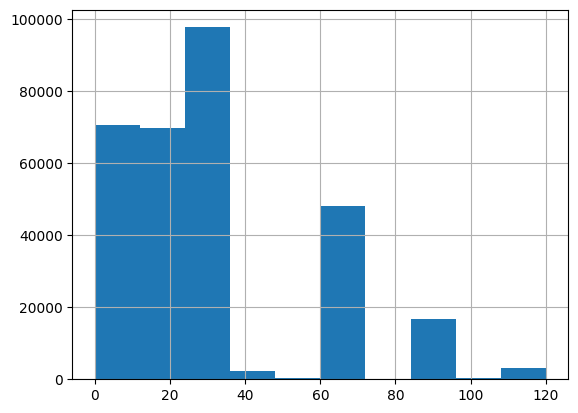

In [23]:
df['Fruit_Consumption'].hist()

### Numerical data distribution

For this part lets look at the distribution of all of the features by ploting them

To do so lets first list all the types of our data from our dataset and take only the numerical ones:

In [24]:
list(set(df.dtypes.tolist()))

[dtype('int32'), dtype('float64')]

In [25]:
df_num = df.select_dtypes(include = ['float64','int32'])
df_num.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70,150.0,32.66,14.54,1.0,0.0,30.0,16.0,12.0
1,3.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,70,165.0,77.11,28.29,0.0,0.0,30.0,0.0,4.0
2,3.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,60,163.0,88.45,33.47,0.0,4.0,12.0,3.0,16.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,75,180.0,93.44,28.73,0.0,0.0,30.0,30.0,8.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,80,191.0,88.45,24.37,1.0,0.0,8.0,4.0,0.0


Now lets plot them all:

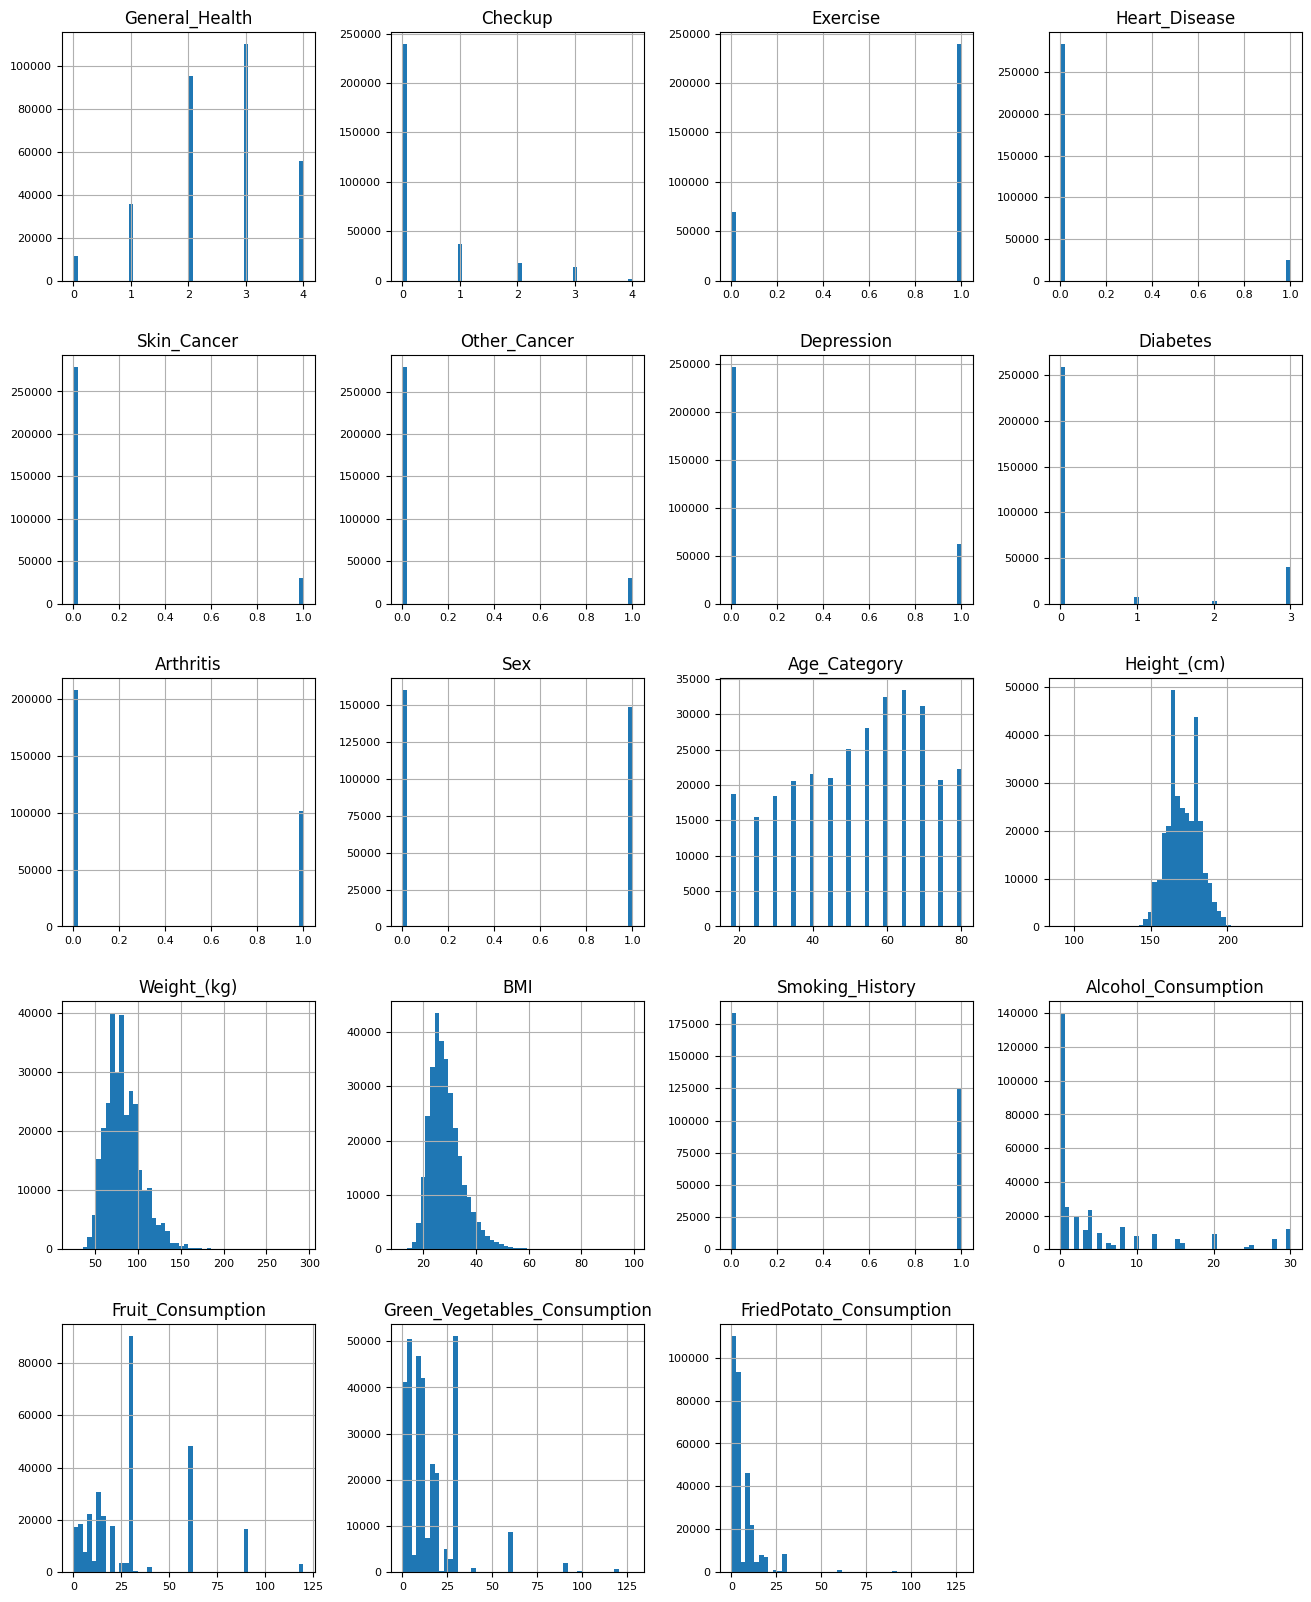

In [26]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

3.0    110395
2.0     95364
4.0     55954
1.0     35810
0.0     11331
Name: General_Health, dtype: int64


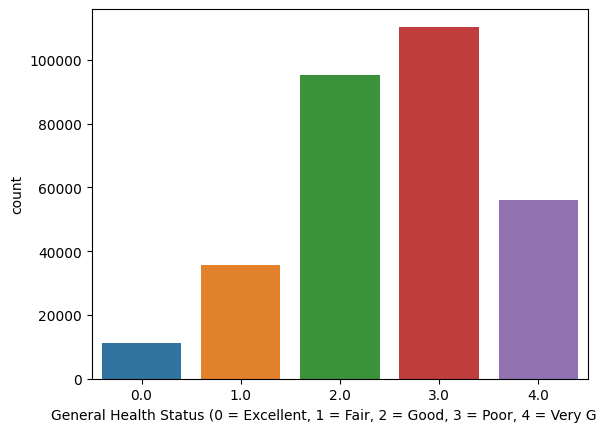

In [27]:
sns.countplot(x=df['General_Health'])
print(df['General_Health'].value_counts())
plt.xlabel("General Health Status (0 = Excellent, 1 = Fair, 2 = Good, 3 = Poor, 4 = Very Good)")
plt.show()

In [28]:
countPoor = len(df[df.General_Health == 3])
countVeryGood = len(df[df.General_Health == 4])
countGood = len(df[df.General_Health == 2])
countFair = len(df[df.General_Health == 1])
countExcellent = len(df[df.General_Health == 0])
print("Percentage of Patients that are Poor in CV Disease: {:.2f}%".format((countPoor / (len(df.General_Health))*100)))
print("Percentage of Patients that are Very Good in CV Disease: {:.2f}%".format((countVeryGood / (len(df.General_Health))*100)))
print("Percentage of Patients that are Good in CV Disease: {:.2f}%".format((countGood / (len(df.General_Health))*100)))
print("Percentage of Patients that are Fair in CV Disease: {:.2f}%".format((countFair / (len(df.General_Health))*100)))
print("Percentage of Patients that are Excellent in CV Disease: {:.2f}%".format((countExcellent / (len(df.General_Health))*100)))

Percentage of Patients that are Poor in CV Disease: 35.74%
Percentage of Patients that are Very Good in CV Disease: 18.12%
Percentage of Patients that are Good in CV Disease: 30.88%
Percentage of Patients that are Fair in CV Disease: 11.59%
Percentage of Patients that are Excellent in CV Disease: 3.67%


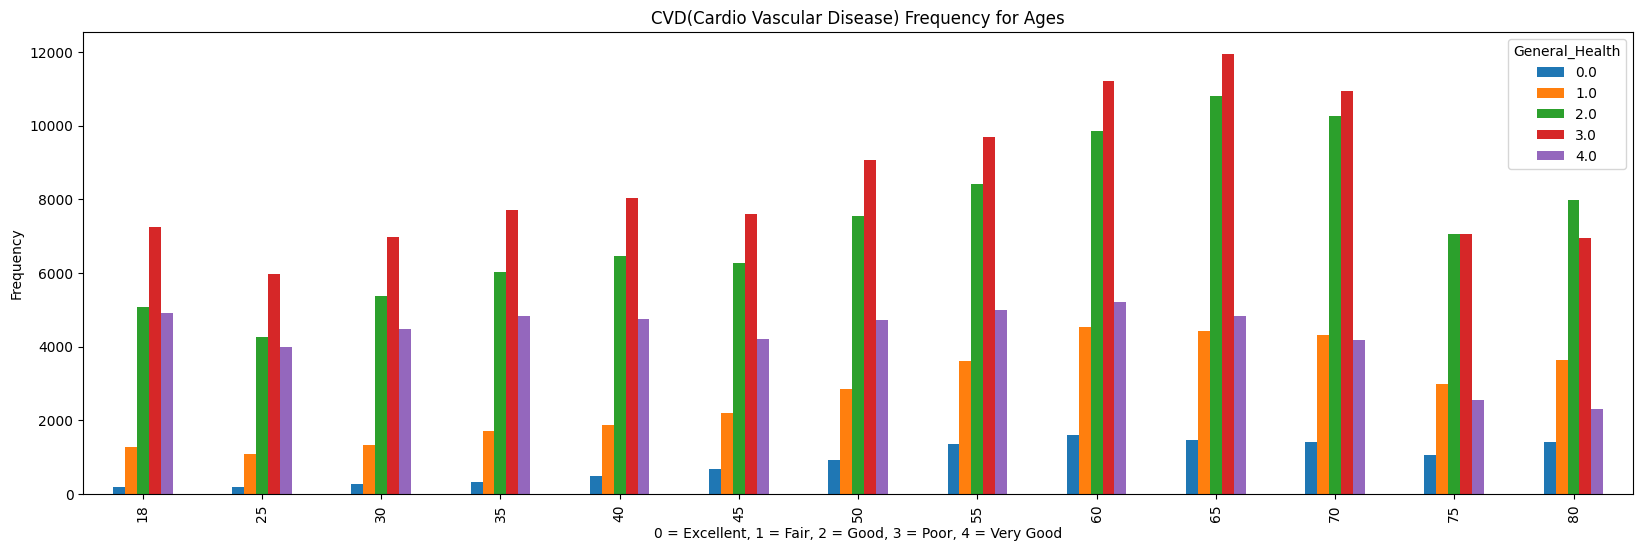

In [29]:
pd.crosstab(df.Age_Category,df.General_Health).plot(kind="bar",figsize=(20,6))
plt.title('CVD(Cardio Vascular Disease) Frequency for Ages')
plt.xlabel('Age')
plt.xlabel("0 = Excellent, 1 = Fair, 2 = Good, 3 = Poor, 4 = Very Good")
plt.ylabel('Frequency')
plt.show()

C:\Users\HP\anaconda33\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


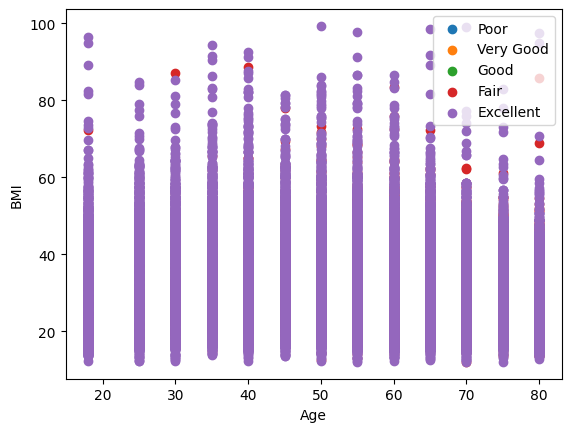

In [30]:
plt.scatter(x=df.Age_Category[df.Heart_Disease==3.0 ], y=df.BMI[(df.Heart_Disease==3.0)])
plt.scatter(x=df.Age_Category[df.Heart_Disease==4.0], y=df.BMI[(df.Heart_Disease==4.0)])
plt.scatter(x=df.Age_Category[df.Heart_Disease==2.0], y=df.BMI[(df.Heart_Disease==2.0)])
plt.scatter(x=df.Age_Category[df.Heart_Disease==1.0], y=df.BMI[(df.Heart_Disease==1.0)])
plt.scatter(x=df.Age_Category[df.Heart_Disease==0.0], y=df.BMI[(df.Heart_Disease==0.0)])

plt.legend(["Poor", "Very Good", "Good", "Fair", "Excellent"])
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

<Axes: xlabel='FriedPotato_Consumption', ylabel='Green_Vegetables_Consumption'>

C:\Users\HP\anaconda33\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\HP\anaconda33\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


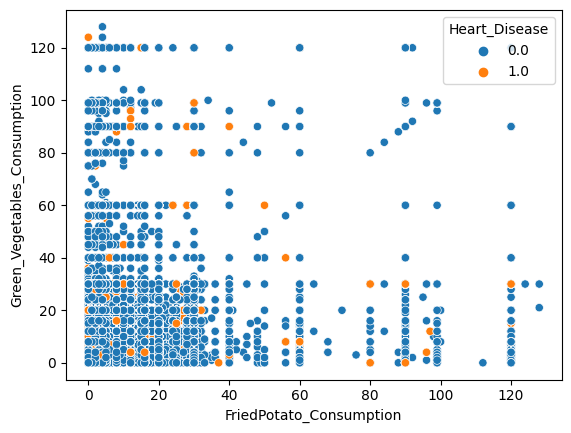

In [31]:
sns.scatterplot(x='FriedPotato_Consumption', y='Green_Vegetables_Consumption', hue='Heart_Disease', data=df)

<Axes: xlabel='FriedPotato_Consumption', ylabel='BMI'>

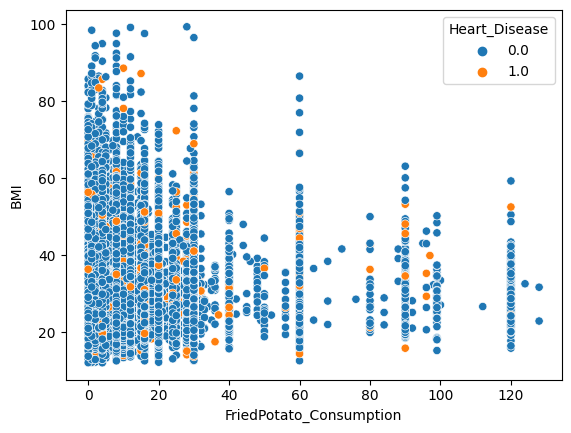

In [32]:
sns.scatterplot(x='FriedPotato_Consumption', y='BMI', hue='Heart_Disease', data=df)

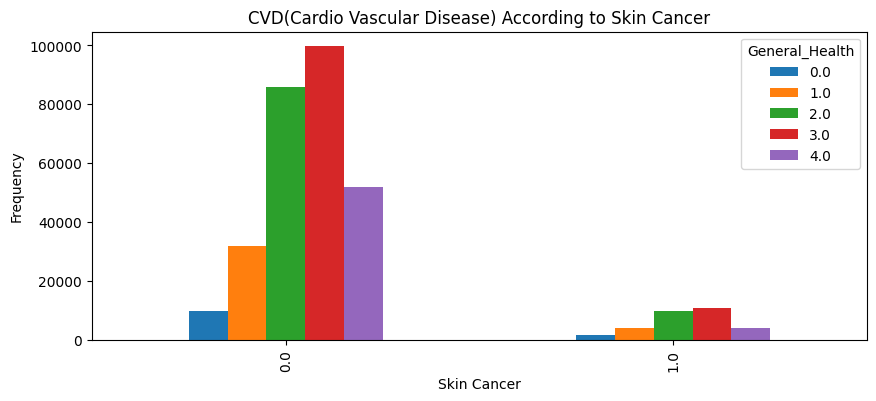

In [33]:
pd.crosstab(df.Skin_Cancer,df.General_Health).plot(kind="bar",figsize=(10,4))
plt.title('CVD(Cardio Vascular Disease) According to Skin Cancer')
plt.xlabel('Skin Cancer')
plt.ylabel('Frequency')
plt.show()

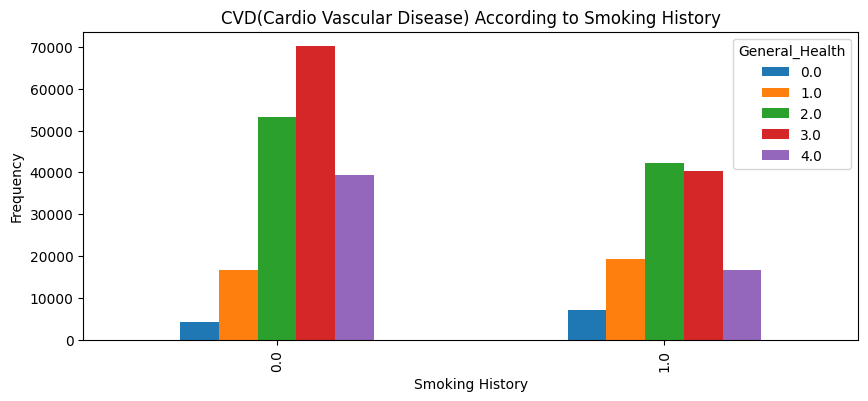

In [34]:
pd.crosstab(df.Smoking_History,df.General_Health).plot(kind="bar",figsize=(10,4))
plt.title('CVD(Cardio Vascular Disease) According to Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Frequency')
plt.show()

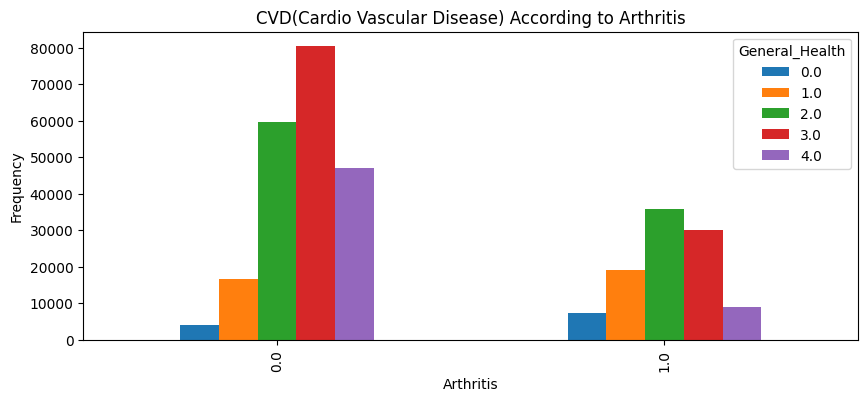

In [35]:
pd.crosstab(df.Arthritis,df.General_Health).plot(kind="bar",figsize=(10,4))
plt.title('CVD(Cardio Vascular Disease) According to Arthritis')
plt.xlabel('Arthritis')
plt.ylabel('Frequency')
plt.show()

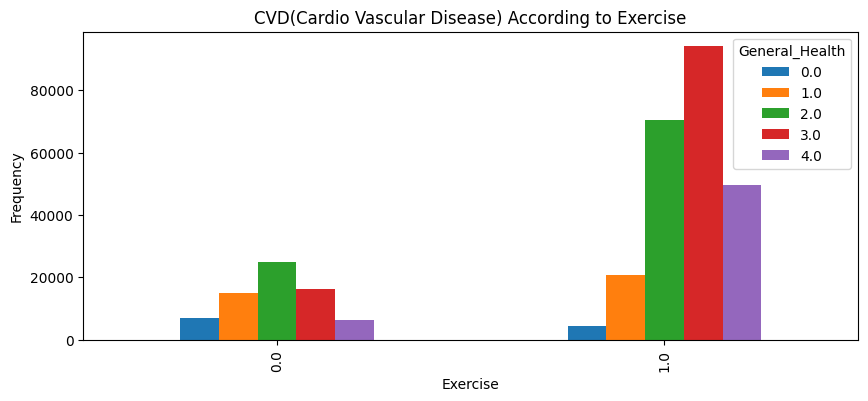

In [36]:
pd.crosstab(df.Exercise,df.General_Health).plot(kind="bar",figsize=(10,4))
plt.title('CVD(Cardio Vascular Disease) According to Exercise')
plt.xlabel('Exercise')
plt.ylabel('Frequency')
plt.show()

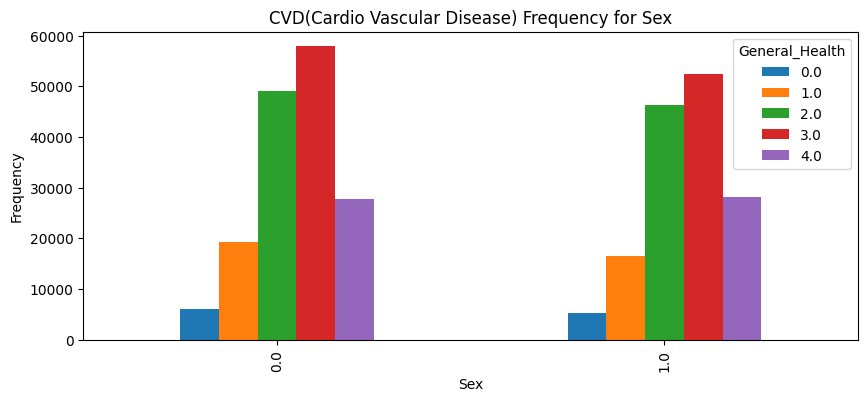

In [37]:
pd.crosstab(df.Sex,df.General_Health).plot(kind="bar",figsize=(10,4))
plt.title('CVD(Cardio Vascular Disease) Frequency for Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

#### Correlation
> Correlation is a statistical method used to evaluate the relationship between two or more variables. It defines the degree to which a pair of variables are linearly related.

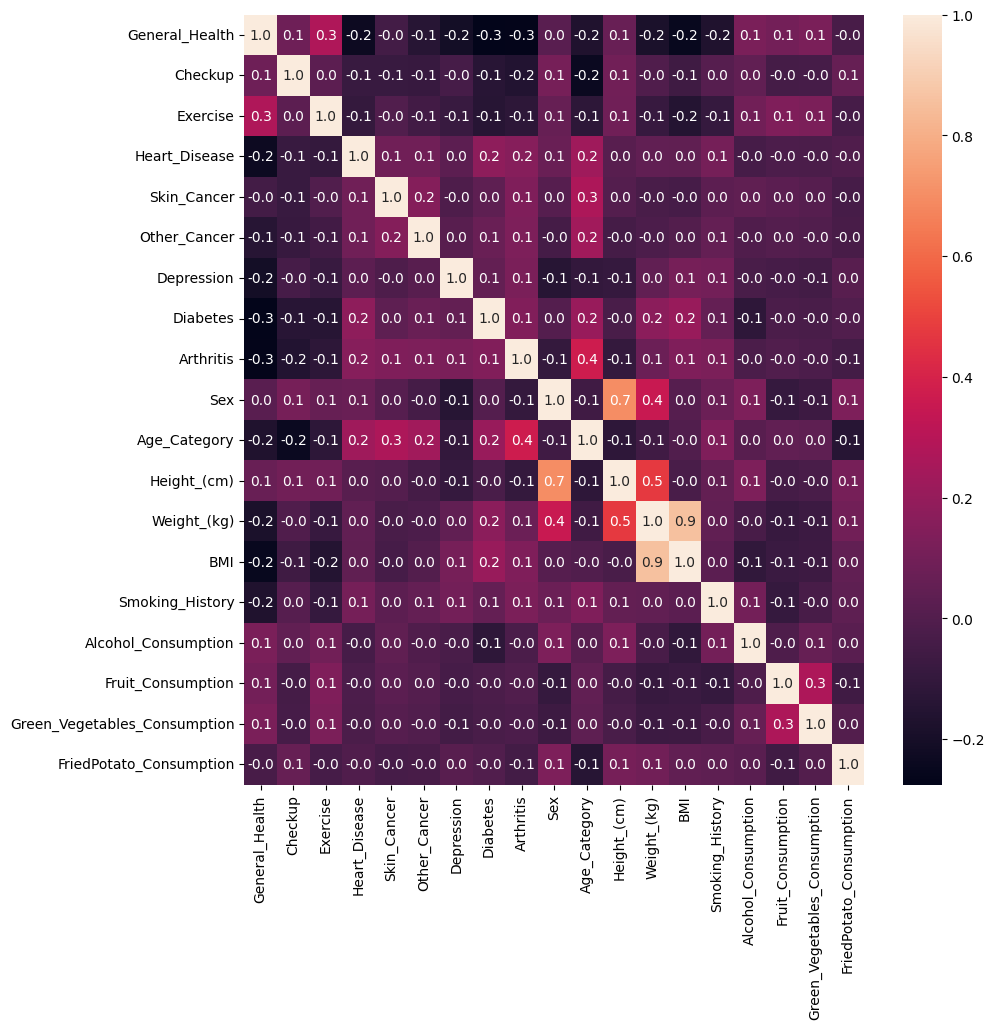

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

> Here, the correlation coefficient values range between -1 to 1.
The correlation coefficient that are close to 1(eg. Weight_(kg) and Height_(cm), BMI and Weight_(kg), etc), they would denote a strong positive relationship between the variables.
The correlation coefficient that are close to -1(eg. Alcohol_Consumption and BMI, Fruit_Consumption and Weight_(kg)), they would indicate a strong negative relationship between the variables.
And a correlation of zero suggests no linear relationship between the variables.